In [1]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression, chi2, VarianceThreshold
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [2]:
'''
Class to be imported in pipeline (below) for dropping the most correlated columns, preventing data leakage.
'''

class MyDecorrelator(BaseEstimator, TransformerMixin): 
    
    def __init__(self, threshold):
        self.threshold = threshold
        self.correlated_columns = None

    def fit(self, X, y=None):
        correlated_features = set()  
        X = pd.DataFrame(X)
        corr_matrix = X.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > self.threshold: # we are interested in absolute coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    correlated_features.add(colname)
        #print(np.shape(pd.DataFrame(X).drop(labels=correlated_features, axis=1)))
        #print(pd.DataFrame(X).drop(labels=correlated_features, axis=1))
        self.correlated_features = correlated_features
        return self

    def transform(self, X, y=None, **kwargs):
        return (pd.DataFrame(X)).drop(labels=self.correlated_features, axis=1)

In [3]:
Data_complete = pd.read_excel(r'Data_Working_Capacity.xlsx', index_col = 0)  #Import Dataset

In [39]:
Data_complete

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,jml_nn_92,jml_nn_93,jml_nn_94,jml_nn_95,jml_nn_96,jml_nn_97,jml_nn_98,jml_nn_99,jml_nn_100,working_capacity_vacuum_swing_REPEAT_chg [mmol/g]
MOFname,,,,,,,,,,,,,,,,,,,,,
str_m1_o10_o18_pcu_sym.166.cif,1165.547500,1397.933220,2.757750,-12.799260,0.000000,11.639012,2.250000,237.985825,32.398019,-1135.622500,...,7.376812,7.405797,7.695652,7.666667,8.043478,8.521739,8.362319,8.246377,8.260870,1.625416
str_m2_o10_o11_pcu_sym.170.cif,1487.894800,1537.832350,5.089800,-10.370148,0.000000,9.166693,2.200000,198.851928,49.136553,-1053.126000,...,6.883721,6.418605,5.953488,7.860465,7.023256,7.534884,5.813953,8.000000,6.790698,2.334895
str_m2_o10_o12_pcu_sym.29.cif,1487.894800,1537.832350,5.089800,-10.370148,0.000000,9.166693,2.200000,198.851928,49.136553,-1053.126000,...,7.416667,8.458333,7.833333,8.375000,8.916667,7.708333,7.541667,8.125000,9.000000,1.714163
str_m2_o10_o13_pcu_sym.1.cif,1487.894800,1537.832350,5.089800,-10.370148,0.000000,9.166693,2.200000,198.851928,49.136553,-1053.126000,...,7.428571,8.214286,8.392857,7.785714,8.285714,7.178571,7.535714,7.392857,8.678571,1.787095
str_m2_o10_o13_pcu_sym.103.cif,1359.557333,1401.174827,5.574833,-11.397623,0.000000,11.256410,2.333333,248.704848,44.199160,-941.665000,...,6.434783,6.826087,6.260870,7.173913,7.739130,6.086957,5.913043,7.130435,6.826087,2.112887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
str_m7_o9_o24_bcu_sym.77.cif,1374.320667,1380.269658,8.195167,-28.021035,0.333333,29.604113,2.833333,755.333023,98.915312,-1022.251667,...,6.365854,6.817073,6.951220,7.073171,6.804878,6.963415,7.975610,7.487805,7.865854,1.703848
str_m7_o9_o24_bcu_sym.78.cif,1356.407333,1398.847960,5.446833,-10.675523,0.000000,10.462073,2.333333,237.867756,44.216138,-1003.370000,...,6.674419,7.244186,7.069767,7.418605,6.953488,8.000000,8.244186,8.127907,7.581395,2.364089
str_m7_o9_o24_bcu_sym.8.cif,1300.395667,1334.542233,6.277500,-17.940357,0.166667,18.192941,2.500000,418.289701,46.519661,-982.943333,...,6.440476,6.119048,6.797619,7.571429,7.285714,7.642857,7.000000,7.785714,7.416667,2.296558


In [5]:
train_df, test_df = train_test_split(Data_complete, test_size=0.2, random_state=0)

In [6]:
rf = RandomForestRegressor(random_state=0)

pipe = Pipeline([
        ('threshold', VarianceThreshold(threshold = 0)),         #Drop features with no variance
        ('decorrelation', MyDecorrelator(0.9)),                  #Drop features with correlation above 0.9
        ('feature_selector', SelectPercentile(f_regression)),    #Select features in terms of the most relevant for f_regression
        ('rf', rf)                                               #Train Random Forest 
        ], verbose = 1)

In [7]:
param_grid = {
    "rf__n_estimators": [100, 200, 500, 1000],                    #Tune the number of estimators
    "rf__max_features": ['auto', 'sqrt', 'log2'],                 #Tune the number of features to consider when looking for the best split
    "feature_selector__percentile": [25, 50, 75, 100]             #Tune the percentage of features to retain in terms of f_regression score
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose = 1, cv = 5)

In [8]:
search.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1])

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 133.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 182.5min finished


[Pipeline] ......... (step 1 of 4) Processing threshold, total=   0.2s
[Pipeline] ..... (step 2 of 4) Processing decorrelation, total= 1.1min
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s
[Pipeline] ................ (step 4 of 4) Processing rf, total=14.2min


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('threshold',
                                        VarianceThreshold(threshold=0)),
                                       ('decorrelation',
                                        MyDecorrelator(threshold=0.9)),
                                       ('feature_selector',
                                        SelectPercentile(percentile=10,
                                                         score_func=<function f_regression at 0x0000013219A8B8B8>)),
                                       ('rf',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_d...
                                                              n_

In [9]:
search.best_params_

{'feature_selector__percentile': 100,
 'rf__max_features': 'auto',
 'rf__n_estimators': 1000}

In [10]:
test_predictions = search.predict(test_df.iloc[:, :-1])
test_labels = test_df.iloc[:, -1].values

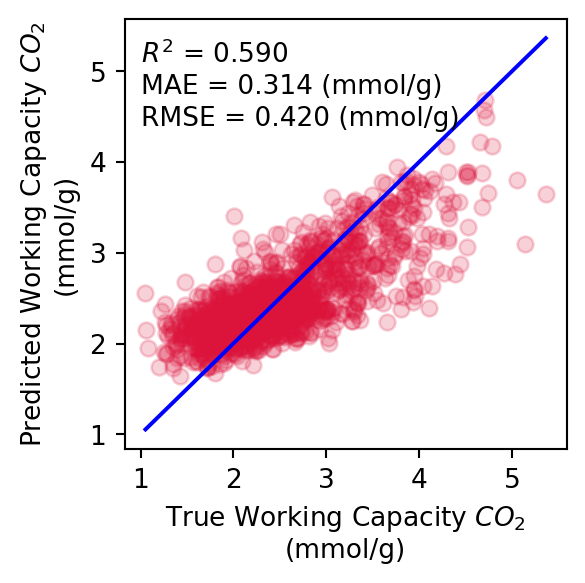

In [26]:


r2 = sklearn.metrics.r2_score(test_labels, test_predictions)
mae = mean_absolute_error(test_labels, test_predictions)
rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))

import matplotlib.pyplot as plt

plt.figure(figsize=(3,3), dpi = 190)
plt.scatter(test_labels, test_predictions, c='crimson', alpha = 0.2)
p1 = max(max(test_predictions), max(test_labels))
p2 = min(min(test_predictions), min(test_labels))
plt.plot([p1, p2], [p1, p2], 'b-')
#plt.rc('xtick', labelsize=15)
#plt.rc('ytick', labelsize = 15)
plt.annotate('$R^2$ = %0.3f' % r2, xy=(1, 5.1), xytext=(1, 5.1),
            )
plt.annotate('MAE = %0.3f (mmol/g)' % mae, xy=(1, 4), xytext=(1, 4.75),
         )
plt.annotate('RMSE = %0.3f (mmol/g)' % rmse, xy=(1, 3), xytext=(1, 4.4),
            )
plt.xlabel('True Working Capacity $CO_2$\n(mmol/g)')#, fontsize = 15)
plt.ylabel('Predicted Working Capacity $CO_2$\n(mmol/g)')#, fontsize = 15
plt.show()

In [40]:
from joblib import dump, load
dump(search, 'Working_capacity_model.joblib') 

['Working_capacity_model.joblib']

# Manual Refit

In [27]:
X_train = train_df.iloc[:, :-1].loc[:, VarianceThreshold(threshold = 0).fit(train_df.iloc[:, :-1]).get_support()]
X_test = test_df[X_train.columns]

In [28]:
correlated_features = set()  
corr_matrix = X_train.iloc[:, :-1].corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            correlated_features.add(colname)

In [29]:
X_train = X_train.drop(labels=correlated_features, axis=1)
X_test = X_test[X_train.columns]
y_train = train_df.iloc[:, -1]
y_test = test_df.iloc[:, -1]

In [30]:
X_train = X_train.loc[:, SelectPercentile(f_regression, percentile = 100).fit(X_train, y_train).get_support()]
X_test = X_test[X_train.columns]

In [31]:
rf = RandomForestRegressor(random_state=0, n_estimators = 1000, max_features = 'auto')
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [32]:
y_predictions = rf.predict(X_test)

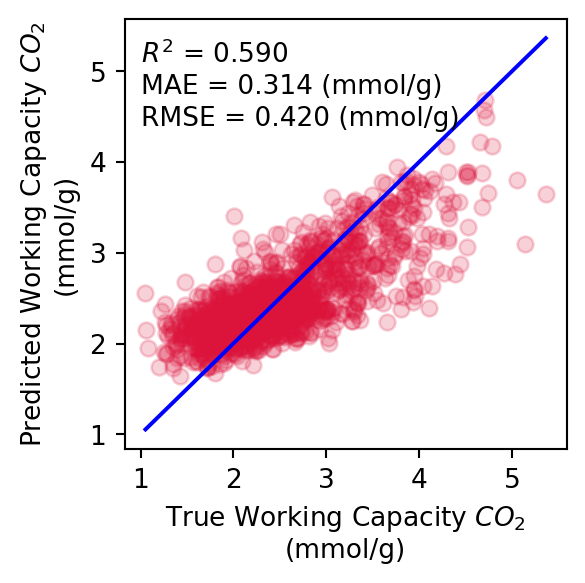

In [34]:
r2 = sklearn.metrics.r2_score(y_test, y_predictions)
mae = mean_absolute_error(y_test, y_predictions)
rmse = np.sqrt(mean_squared_error(y_test, y_predictions))

import matplotlib.pyplot as plt

plt.figure(figsize=(3,3), dpi = 190)
plt.scatter(test_labels, test_predictions, c='crimson', alpha = 0.2)
p1 = max(max(y_predictions), max(y_test))
p2 = min(min(y_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
#plt.rc('xtick', labelsize=15)
#plt.rc('ytick', labelsize = 15)
plt.annotate('$R^2$ = %0.3f' % r2, xy=(1, 5.1), xytext=(1, 5.1),
            )
plt.annotate('MAE = %0.3f (mmol/g)' % mae, xy=(1, 4), xytext=(1, 4.75),
         )
plt.annotate('RMSE = %0.3f (mmol/g)' % rmse, xy=(1, 3), xytext=(1, 4.4),
            )
plt.xlabel('True Working Capacity $CO_2$\n(mmol/g)')#, fontsize = 15)
plt.ylabel('Predicted Working Capacity $CO_2$\n(mmol/g)')#, fontsize = 15
plt.show()

In [35]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

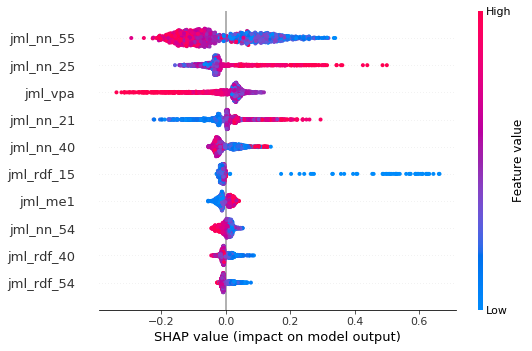

In [36]:
shap.summary_plot(shap_values, X_test, max_display = 10)

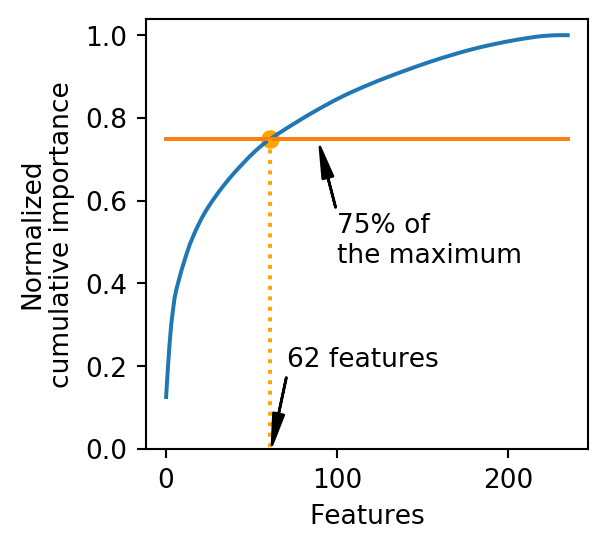

In [37]:
N = np.shape(X_test)[1]
k = 0.75
import matplotlib.pyplot as plt
cumsum = np.cumsum(np.sort(np.mean(abs(shap_values), axis = 0))[::-1])
normalized_cumulative = np.cumsum(np.sort(np.mean(abs(shap_values), axis = 0))[::-1])/(np.max(np.cumsum(np.sort(np.mean(abs(shap_values), axis = 0))[::-1])))

                                                                                       
fig, ax = plt.subplots(figsize=(3, 3), dpi = 190)
ax.plot(np.arange(N), normalized_cumulative)
ax.plot(np.arange(N), k*np.ones(N))
ind_cross1 = np.argmin(np.fabs(normalized_cumulative-k*max(normalized_cumulative)*np.ones(N)))
#plt.yticks(np.array([0, 0.5, 1]))

ax.annotate('%i features' %(ind_cross1+1), xy=(ind_cross1+1, .01), xytext=(ind_cross1+10,.2),
            arrowprops=dict(facecolor='black', shrink=0.000005, width = .1, headwidth=4),
            )
ax.annotate('75% of\nthe maximum', xy=(90, 0.73), xytext=(100, 0.45),
            arrowprops=dict(facecolor='black', shrink=0.0005, width = .1, headwidth=4),
            )
plt.scatter(ind_cross1, normalized_cumulative[ind_cross1], color = 'orange')
plt.plot((ind_cross1, ind_cross1), (normalized_cumulative[ind_cross1], 0), color = 'orange', ls = ':')
plt.ylim(0, 1.04)
plt.xlabel('Features')
plt.ylabel('Normalized\ncumulative importance')
plt.show()

In [41]:
Output_shap = pd.DataFrame(shap_values, index = X_test.index, columns = X_test.columns)
Output_shap_mean = pd.DataFrame(abs(Output_shap).describe().loc['mean']/sum(abs(Output_shap).describe().loc['mean'])).sort_values('mean', ascending = False)
Output_shap_mean.to_excel('Output_mean_shap_Working_capacity.xlsx')

In [42]:
Output_shap.to_excel('Output_shap_Working_capacity.xlsx')